測試資料
---
1. Download data, 如何下載資料
- Using Database by Pandas, 如何使用資料庫
- Technical Index Introducing, 引進技術指標
- TSM as example, 用台積電當例子
- Use pycaret to make prediction models for popular known machine learning schemes.

Note
---
1. has to install all the required packages, for instance, talib. install by pip:
```
> pip install yfinance
```
- Complete the case.

- (2020/09/30) Use pycaret, test all the prediction schemes,
- (2020/10/18) Stationary test

Date: 2020/09/23

- put all the python files in same directory.

In [1]:
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
import matplotlib.dates as dates
#import pandas_datareader.data as web
from pandas_datareader import data as web
import datetime as dt
import gc
import pandas as pd
import pandas_ta as ta

import numpy as np
import matplotlib.pyplot as plt
import plotly.express as ex

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa import stattools
import statsmodels

#from hmmlearn.hmm import GaussianHMM
import yfinance as yf
yf.pdr_override()

In [3]:
from datetime import date
today = date.today()

In [4]:
# Observe recent changes

start = dt.datetime(2019, 1, 1)
end = today

In [5]:
AAPL='AAPL'
AAPL_t='蘋果'

TSM='2330.TW'
TSM_t='台積電'
MediaT='2454.TW'
MediaT_t='聯發科'
Macronix='2337.TW'
Macronix_t='旺宏電子'

In [6]:
def get_stock(target,start,end):
    df=web.get_data_yahoo([target],start, end)
    df.fillna(method='ffill',inplace=True)
    df.fillna(method='bfill',inplace=True)
    return df

In [7]:
df_TSM=web.get_data_yahoo([TSM],start, end)

[*********************100%***********************]  1 of 1 completed


In [8]:
df_TSM.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 434 entries, 2019-01-02 to 2020-10-20
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       434 non-null    float64
 1   High       434 non-null    float64
 2   Low        434 non-null    float64
 3   Close      434 non-null    float64
 4   Adj Close  434 non-null    float64
 5   Volume     434 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 23.7 KB


In [8]:
y=df_TSM['Close'].shift(-1).values
#y[0]=y[1]
#df_TSM['y']=y

In [9]:
y[-1]=y[-2]
df_TSM['y']=y

In [10]:
df_TSM.tail()

,Open,High,Low,Close,Adj Close,Volume,y
Date,,,,,,,
2020-10-14,460.5,461.0,457.0,459.0,459.0,40809241,453.0
2020-10-15,456.0,456.5,450.0,453.0,453.0,47775028,449.0
2020-10-16,451.0,456.0,448.5,449.0,449.0,46876801,457.5
2020-10-19,453.0,457.5,451.0,457.5,457.5,34470906,451.0
2020-10-20,455.5,457.0,451.0,451.0,451.0,25205638,451.0


Technique Indexes Introduction,
---
Now type integrate the Moving Average of week (5 days), and  month (20 days).

In [11]:
# pandas_da uses `close` as target column, Upper character changed to lower case

#df_TSM['close']=df_TSM['Close']
df_TSM.ta(kind='ema', length=5,append=True)
df_TSM.ta(kind='ema', length=20,append=True)            

date
2019-01-02           NaN
2019-01-03           NaN
2019-01-04           NaN
2019-01-07           NaN
2019-01-08           NaN
                 ...    
2020-10-14    442.761997
2020-10-15    443.737045
2020-10-16    444.238279
2020-10-19    445.501300
2020-10-20    446.024986
Name: EMA_20, Length: 434, dtype: float64

In [10]:
df_TSM

,open,high,low,close,adj_close,volume,y,EMA_5,EMA_20
date,,,,,,,,,
2019-01-02,226.5,226.5,219.0,219.5,204.531845,32900482,215.5,NaN,NaN
2019-01-03,214.0,218.0,214.0,215.5,200.804611,34087620,208.0,NaN,NaN
2019-01-04,211.5,211.5,206.5,208.0,193.816055,65943521,213.0,NaN,NaN
2019-01-07,212.0,214.0,211.0,213.0,198.475113,35442176,211.0,NaN,NaN
2019-01-08,212.0,212.5,210.0,211.0,196.611496,22694481,215.5,213.400000,NaN
...,...,...,...,...,...,...,...,...,...
2020-10-14,460.5,461.0,457.0,459.0,459.000000,40809241,453.0,454.930702,442.761997
2020-10-15,456.0,456.5,450.0,453.0,453.000000,47775028,449.0,454.287135,443.737045
2020-10-16,451.0,456.0,448.5,449.0,449.000000,46876801,457.5,452.524756,444.238279


In [12]:
df_TSM['MA5']=df_TSM['EMA_5']
df_TSM['MA20']=df_TSM['EMA_20']

# prevant nan's in the first Moving average

df_TSM.fillna(method='bfill',inplace=True)



In [12]:
df_TSM.head()

,open,high,low,close,adj_close,volume,y,EMA_5,EMA_20,MA5,MA20
date,,,,,,,,,,,
2019-01-02,226.5,226.5,219.0,219.5,204.531845,32900482,215.5,213.4,218.975,213.4,218.975
2019-01-03,214.0,218.0,214.0,215.5,200.804611,34087620,208.0,213.4,218.975,213.4,218.975
2019-01-04,211.5,211.5,206.5,208.0,193.816055,65943521,213.0,213.4,218.975,213.4,218.975
2019-01-07,212.0,214.0,211.0,213.0,198.475113,35442176,211.0,213.4,218.975,213.4,218.975
2019-01-08,212.0,212.5,210.0,211.0,196.611496,22694481,215.5,213.4,218.975,213.4,218.975


<AxesSubplot:xlabel='date'>

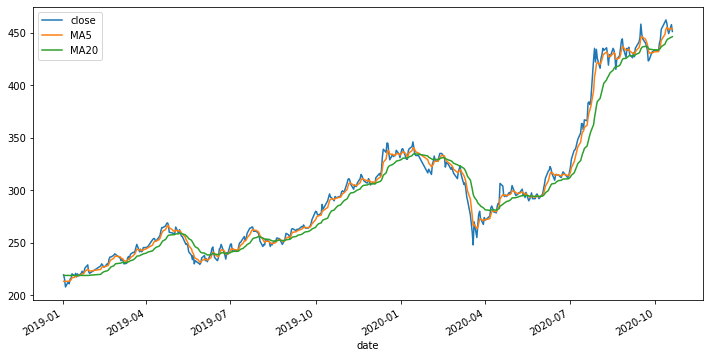

In [13]:
df_TSM[['close','MA5','MA20']].plot(figsize=[12,6])

Stationary Test
---
Before making prediction, we apply Augmented Dickey-Fuller Test, a common statistical test used to test whether a given Time series is stationary or not on the target sataset. We can achieve this by defining the null and alternate hypothesis:
- $H_0$: Null Hypothesis: Time Series is non-stationary. It gives a time-dependent trend.
- $H_1$: Alternate Hypothesis: Time Series is stationary. In another term, the series doesn’t depend on time.

From the following calculusion, we conclude that 
- the native `prediction`, $y$, is not non-staiontary; thus, we use the `difference` method to make data stionary:
- the difference of data is stationary now; 

In [14]:
# ADF statistic to check stationarity
t = df_TSM["close"].values
timeseries = adfuller(t)
print('ADF Statistic: %f' % timeseries[0])
print('\tp-value: %f' % timeseries[1])
print('Critical Values:')
for key, value in timeseries[4].items():
    print('\t%s: %.3f' % (key, value))
if timeseries[0] > timeseries[4]["5%"]:
   print ("Do not Reject Ho - Time Series is Non-Stationary")
else:
   print ("Reject Ho - Time Series is Stationary")

ADF Statistic: 0.260948
	p-value: 0.975480
Critical Values:
	1%: -3.446
	5%: -2.868
	10%: -2.570
Do not Reject Ho - Time Series is Non-Stationary


In [15]:
df_TSM.ta.log_return(cumulative=False, append=True);

In [16]:
df_TSM.head()

,open,high,low,close,adj_close,volume,y,EMA_5,EMA_20,MA5,MA20,LOGRET_1
date,,,,,,,,,,,,
2019-01-02,226.5,226.5,219.0,219.5,204.531845,32900482,215.5,213.4,218.975,213.4,218.975,NaN
2019-01-03,214.0,218.0,214.0,215.5,200.804611,34087620,208.0,213.4,218.975,213.4,218.975,-0.018391
2019-01-04,211.5,211.5,206.5,208.0,193.816055,65943521,213.0,213.4,218.975,213.4,218.975,-0.035423
2019-01-07,212.0,214.0,211.0,213.0,198.475113,35442176,211.0,213.4,218.975,213.4,218.975,0.023754
2019-01-08,212.0,212.5,210.0,211.0,196.611496,22694481,215.5,213.4,218.975,213.4,218.975,-0.009434


In [17]:
df_TSM['logRet']=df_TSM['LOGRET_1']

In [18]:
df_TSM.fillna(method='bfill',inplace=True)
df_TSM.head()

,open,high,low,close,adj_close,volume,y,EMA_5,EMA_20,MA5,MA20,LOGRET_1,logRet
date,,,,,,,,,,,,,
2019-01-02,226.5,226.5,219.0,219.5,204.531845,32900482,215.5,213.4,218.975,213.4,218.975,-0.018391,-0.018391
2019-01-03,214.0,218.0,214.0,215.5,200.804611,34087620,208.0,213.4,218.975,213.4,218.975,-0.018391,-0.018391
2019-01-04,211.5,211.5,206.5,208.0,193.816055,65943521,213.0,213.4,218.975,213.4,218.975,-0.035423,-0.035423
2019-01-07,212.0,214.0,211.0,213.0,198.475113,35442176,211.0,213.4,218.975,213.4,218.975,0.023754,0.023754
2019-01-08,212.0,212.5,210.0,211.0,196.611496,22694481,215.5,213.4,218.975,213.4,218.975,-0.009434,-0.009434


In [19]:
#ADF statistic to check stationarity
t = df_TSM["logRet"].values
timeseries = adfuller(t)
print('ADF Statistic: %f' % timeseries[0])
print('\tp-value: %f' % timeseries[1])
print('Critical Values:')
for key, value in timeseries[4].items():
    print('\t%s: %.3f' % (key, value))
if timeseries[0] > timeseries[4]["5%"]:
   print ("Failed to Reject Ho - Time Series is Non-Stationary")
else:
   print ("Reject Ho - Time Series is Stationary")

ADF Statistic: -21.335930
	p-value: 0.000000
Critical Values:
	1%: -3.446
	5%: -2.868
	10%: -2.570
Reject Ho - Time Series is Stationary


In [68]:
### Make a plot to display stationary and non-stationary data

Random Noise Test
---
Use Ljung-Box test whether the target data is ramdom noise;
- $H_0:$ sequence of data is random noise,
- $H_1:$ data is self-correlated.

In [20]:
def LJtest(arr,level=0.01):
    LJ=stattools.q_stat(stattools.acf(arr)[1:13],len(arr))
    p=LJ[1][-1]

    print("p-value: %5.2f" %p)
    if (p<=0.05):
        print("Do not reject Ho - data are self-correlated.")
    else:
        print("Reject Ho - data are random noise.")
    #return LJ[1][-1]

In [21]:
LJtest(t)

p-value:  0.48
Reject Ho - data are random noise.


In [22]:
LJtest(df_TSM['close'].values)

p-value:  0.00
Do not reject Ho - data are self-correlated.


Conclusion
---
`LogRet` column is stationary and self-correlated, such that we can make predict on it by these features.

In [55]:
df_TSM.head()

,Open,High,Low,Close,Adj Close,Volume,y,MA5,MA20,Ret
Date,,,,,,,,,,
2019-01-02,226.5,226.5,219.0,219.5,204.53,32900482,215.5,213.4,218.975,-4.0
2019-01-03,214.0,218.0,214.0,215.5,200.80,34087620,208.0,213.4,218.975,-7.5
2019-01-04,211.5,211.5,206.5,208.0,193.82,65943521,213.0,213.4,218.975,5.0
2019-01-07,212.0,214.0,211.0,213.0,198.48,35442176,211.0,213.4,218.975,-2.0
2019-01-08,212.0,212.5,210.0,211.0,196.61,22694481,215.5,213.4,218.975,4.5


In [23]:
from pycaret.regression import *

In [24]:
df_TSM.columns

Index(['open', 'high', 'low', 'close', 'adj_close', 'volume', 'y', 'EMA_5',
       'EMA_20', 'MA5', 'MA20', 'LOGRET_1', 'logRet'],
      dtype='object')

In [25]:
features=['open', 'high', 'low', 'close', 'volume','MA5','MA20', 'logRet']

In [26]:
ratio=len(df_TSM)//10*8

In [27]:
ratio=-5
train=df_TSM.iloc[:ratio,:]
test=df_TSM.iloc[ratio:,:]

In [28]:
train.tail()

,open,high,low,close,adj_close,volume,y,EMA_5,EMA_20,MA5,MA20,LOGRET_1,logRet
date,,,,,,,,,,,,,
2020-10-06,441.5,442.0,437.5,439.5,439.5,35775395,443.0,434.411268,434.044189,434.411268,434.044189,0.016055,0.016055
2020-10-07,435.0,445.0,435.0,443.0,443.0,42926239,453.0,437.274179,434.897123,437.274179,434.897123,0.007932,0.007932
2020-10-08,450.0,454.0,448.5,453.0,453.0,60853811,460.0,442.516119,436.621206,442.516119,436.621206,0.022322,0.022322
2020-10-12,458.0,462.0,457.5,460.0,460.0,64719223,462.0,448.344080,438.847758,448.344080,438.847758,0.015334,0.015334
2020-10-13,465.0,465.0,456.5,462.0,462.0,45750738,459.0,452.896053,441.052734,452.896053,441.052734,0.004338,0.004338


In [29]:
clf = setup(data = train[features], target = features[-1],train_size=0.8,normalize=True)

 
Setup Succesfully Completed.


,Description,Value
0,session_id,5133
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(429, 8)"
4,Missing Values,False
5,Numeric Features,7
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [30]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,Huber Regressor,0.0075,0.0001,0.0101,0.6105,0.0090,0.0108,0.0912
1,TheilSen Regressor,0.0075,0.0001,0.0100,0.6037,0.0087,0.0015,1.5068
2,Bayesian Ridge,0.0075,0.0001,0.0101,0.6005,0.0090,0.0208,0.0085
3,Linear Regression,0.0076,0.0001,0.0102,0.5977,0.0090,0.0201,0.0065
4,Random Sample Consensus,0.0077,0.0001,0.0103,0.5919,0.0092,0.0177,0.1807
5,Ridge Regression,0.0100,0.0002,0.0135,0.3464,0.0122,-0.0466,0.0068
6,Light Gradient Boosting Machine,0.0120,0.0003,0.0165,0.0299,0.0131,-0.0806,0.0487
7,Passive Aggressive Regressor,0.0128,0.0003,0.0171,-0.0542,0.0168,0.0573,0.0076
8,Lasso Regression,0.0129,0.0003,0.0172,-0.0585,0.0158,-0.1334,0.0076
9,Lasso Least Angle Regression,0.0129,0.0003,0.0172,-0.0585,0.0158,-0.1334,0.0077


HuberRegressor(alpha=0.0001, epsilon=1.35, fit_intercept=True, max_iter=100,
               tol=1e-05, warm_start=False)

In [31]:
clf_rf = create_model('rf')
tuned_rf = tune_model(clf_rf)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0130,0.0003,0.0174,-0.2470,0.0145,0.1716
1,0.0136,0.0003,0.0170,0.0661,0.0149,0.0857
2,0.0108,0.0002,0.0129,0.0986,0.0118,-0.2327
3,0.0155,0.0005,0.0234,-0.0594,0.0194,-0.2018
4,0.0137,0.0004,0.0188,-0.1368,0.0145,-0.1024
5,0.0098,0.0002,0.0133,0.1705,0.0116,0.0774
6,0.0157,0.0006,0.0235,-0.3838,0.0190,0.3463
7,0.0093,0.0001,0.0114,-0.0180,0.0092,-0.0057
8,0.0125,0.0002,0.0155,-0.0254,0.0125,-0.2179
9,0.0156,0.0004,0.0197,-0.1515,0.0170,-0.4152


In [32]:
clf_mlp = create_model('mlp')
tuned_mlp = tune_model(clf_mlp)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0103,0.0002,0.0153,0.0296,0.0113,0.1054
1,0.0095,0.0002,0.0126,0.4870,0.0123,-0.0545
2,0.0084,0.0001,0.0100,0.4608,0.0096,-0.2611
3,0.0107,0.0003,0.0182,0.3602,0.0172,-0.2728
4,0.0093,0.0002,0.0126,0.4898,0.0114,-0.0303
5,0.0097,0.0002,0.0150,-0.0629,0.0101,0.2236
6,0.0108,0.0002,0.0148,0.4541,0.0136,0.0884
7,0.0074,0.0001,0.0088,0.3888,0.0072,0.0199
8,0.0093,0.0001,0.0114,0.4449,0.0106,-0.0728
9,0.0122,0.0003,0.0162,0.2196,0.0147,-0.3076


In [33]:
predict_clf=predict_model(tuned_rf,data=test[features])
oop=predict_clf['Label'].values

In [34]:
predict_mlp=predict_model(tuned_mlp,data=test[features])
oop_mlp=predict_mlp['Label'].values

In [35]:
oop_mlp

array([ 0.0055,  0.0006, -0.0087,  0.0104, -0.007 ])

In [36]:
oop

array([0.0063, 0.0044, 0.0044, 0.0065, 0.0057])

In [38]:
df_TSM.tail()

,open,high,low,close,adj_close,volume,y,EMA_5,EMA_20,MA5,MA20,LOGRET_1,logRet
date,,,,,,,,,,,,,
2020-10-14,460.5,461.0,457.0,459.0,459.0,40809241,453.0,454.930702,442.761997,454.930702,442.761997,-0.006515,-0.006515
2020-10-15,456.0,456.5,450.0,453.0,453.0,47775028,449.0,454.287135,443.737045,454.287135,443.737045,-0.013158,-0.013158
2020-10-16,451.0,456.0,448.5,449.0,449.0,46876801,457.5,452.524756,444.238279,452.524756,444.238279,-0.008869,-0.008869
2020-10-19,453.0,457.5,451.0,457.5,457.5,34470906,451.0,454.183171,445.501300,454.183171,445.501300,0.018754,0.018754
2020-10-20,455.5,457.0,451.0,451.0,451.0,25205638,451.0,453.122114,446.024986,453.122114,446.024986,-0.014310,-0.014310


In [37]:
df_TSM.iloc[-5:,-1]

date
2020-10-14   -0.006515
2020-10-15   -0.013158
2020-10-16   -0.008869
2020-10-19    0.018754
2020-10-20   -0.014310
Name: logRet, dtype: float64

In [39]:
test['logRet_rf']=oop
test['logRet_mlp']=oop_mlp

<AxesSubplot:xlabel='date'>

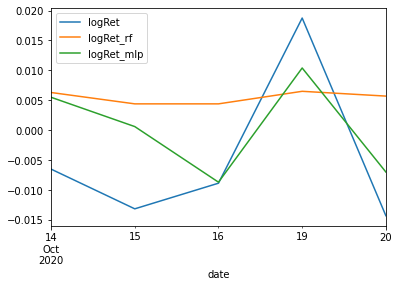

In [40]:
test[['logRet','logRet_rf','logRet_mlp']].plot()

In [41]:
ex.line(test[['logRet','logRet_rf','logRet_mlp']],title="Predict Log of Return")

In [42]:
test

,open,high,low,close,adj_close,volume,y,EMA_5,EMA_20,MA5,MA20,LOGRET_1,logRet,logRet_rf,logRet_mlp
date,,,,,,,,,,,,,,,
2020-10-14,460.5,461.0,457.0,459.0,459.0,40809241,453.0,454.930702,442.761997,454.930702,442.761997,-0.006515,-0.006515,0.0063,0.0055
2020-10-15,456.0,456.5,450.0,453.0,453.0,47775028,449.0,454.287135,443.737045,454.287135,443.737045,-0.013158,-0.013158,0.0044,0.0006
2020-10-16,451.0,456.0,448.5,449.0,449.0,46876801,457.5,452.524756,444.238279,452.524756,444.238279,-0.008869,-0.008869,0.0044,-0.0087
2020-10-19,453.0,457.5,451.0,457.5,457.5,34470906,451.0,454.183171,445.501300,454.183171,445.501300,0.018754,0.018754,0.0065,0.0104
2020-10-20,455.5,457.0,451.0,451.0,451.0,25205638,451.0,453.122114,446.024986,453.122114,446.024986,-0.014310,-0.014310,0.0057,-0.0070


In [45]:
df_TSM['close'][-6:-1]

date
2020-10-13    462.0
2020-10-14    459.0
2020-10-15    453.0
2020-10-16    449.0
2020-10-19    457.5
Name: close, dtype: float64

In [48]:
df_TSM['close'][-6:-1].values*np.exp(df_TSM['logRet'][-5:])

date
2020-10-14    459.0
2020-10-15    453.0
2020-10-16    449.0
2020-10-19    457.5
2020-10-20    451.0
Name: logRet, dtype: float64

In [50]:
test['Predict_MLP']=df_TSM['close'][-6:-1].values*np.exp(test['logRet_mlp'].values)
test['Predict_rf']=df_TSM['close'][-6:-1].values*np.exp(test['logRet_rf'].values)


In [54]:
ex.line(test[['close','Predict_rf','Predict_MLP']],title="Predict")

In [43]:
462.0*np.exp(-0.006515),462.0*np.exp(-0.006515)

458.99985358875125

In [53]:
np.log(459/462)

-0.006514681021193642

In [68]:
test['pred']=(df_TSM.iloc[-6:-1]['Close']+oop).values

In [81]:
test['pred_mlp']=(df_TSM.iloc[-6:-1]['Close']+oop_mlp).values

<AxesSubplot:xlabel='Date'>

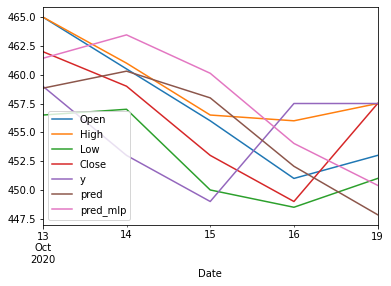

In [82]:
test[['Open','High','Low','Close','y','pred','pred_mlp']].plot()

In [ ]:
ex.line(test[['Open','High','Low','Close','y','pred','pred_mlp']])

In [49]:
train[-2:]

,Open,High,Low,Close,Adj Close,Volume,y,diff
Date,,,,,,,,
2020-10-06,441.5,442.0,437.5,439.5,439.5,35775395,443.0,3.5
2020-10-07,435.0,445.0,435.0,443.0,443.0,42926239,453.0,10.0


In [50]:
test

,Open,High,Low,Close,Adj Close,Volume,y,diff,pred
Date,,,,,,,,,
2020-10-08,450.0,454.0,448.5,453.0,453.0,60853811,460.0,7.0,447.500
2020-10-12,458.0,462.0,457.5,460.0,460.0,64719223,462.0,2.0,454.500
2020-10-13,465.0,465.0,456.5,462.0,462.0,45750738,459.0,-3.0,456.500
2020-10-14,460.5,461.0,457.0,459.0,459.0,40809241,453.0,-6.0,455.025
2020-10-15,456.0,456.5,450.0,453.0,453.0,47775028,453.0,0.0,447.500


In [8]:
df_TSM.to_csv("csv/TSM.csv")

In [ ]:
df_MediaT=web.get_data_yahoo([MediaT],start, end)

In [ ]:
df_Macronix=web.get_data_yahoo([Macronix],start, end)

In [ ]:
len(df_AAPL),len(df_TSM)

In [ ]:
df=df_AAPL[['Close']].copy()

In [ ]:
df.rename(columns={'Close':'AAPL'},inplace=True)


In [ ]:
df['TSM']=df_TSM['Close']

In [ ]:
df.fillna(method='bfill',inplace=True)

In [ ]:
df.info()

In [ ]:
df.head()

In [ ]:
df.plot(figsize=[12,6])

In [ ]:
(df/df.iloc[0]).plot(figsize=[12,6],title="Profit, $p_i/p_{i-1}$");

In [ ]:
Return=np.log(df/df.shift(1))
Return=Return.dropna()


Return.hist(bins=25,figsize=(12,4));

Execellent visualization, right? But we can  do this better by plotly!

In [ ]:
Return.hist?

In [ ]:
pd.options.plotting.backend ="plotly"

In [ ]:
Return.plot(kind="hist", opacity=0.6, bins=25,title=" Returrns of Comanies")

As expected, more flexibly than matplotlib redering. You can try other otionals: 
```
histnorm='probability density',
marginal='box',
```

In [ ]:
Ret_mean=Return.mean()*252
Ret_mean

In [ ]:
Ret_cov=Return.cov()*252
Ret_cov

In [ ]:
Ret_cor=Return.corr()
Ret_cor

In [ ]:
x=np.random.random(len(df.columns))
w=x/x.sum()
w

In [ ]:
R_Bin=np.sum(w*Ret_mean)
R_Bin

In [ ]:
vol_Bin=np.sqrt(np.dot(w,np.dot(Ret_cov,w.T)))
vol_Bin

In [ ]:
print("Portfolio: ",list(df.columns))

print("Weights: %6.4f, %6.4f" %(w[0],w[1]))

print("Profit, %6.4f, with volatility, %6.4f" %(R_Bin,vol_Bin))